In [1]:
import csv
import numpy as np
import pandas as pd
from math import factorial

import datetime
from datetime import date
import datetime
import time

import scipy
import os, os.path
from os import listdir
from os.path import isfile, join

import re
# from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sb

import sys


# search path for modules
# look @ https://stackoverflow.com/questions/67631/how-to-import-a-module-given-the-full-path
sys.path.append('/Users/hn/Documents/00_GitHub/Ag/NASA/Python_codes/')
import NASA_core as nc
import NASA_plot_core as npc

### Set up directories

In [2]:
data_dir = "/Users/hn/Documents/01_research_data/NASA/VI_TS/03_third_investigation/"

In [3]:
# import glob
# All files ending with .txt
# glob.glob(data_dir + "*.csv")

file_names = [x for x in os.listdir(data_dir) if x.endswith(".csv")]
file_names

['Grant_4Fields_Landsat7_T1_L2_2008-01-01_2021-07-01.csv',
 'Grant_4Fields_Sentinel_70cloud_2015-06-01_2021-07-01.csv',
 'Grant_4Fields_Landsat7_T1_SR_2008-01-01_2021-07-01.csv',
 'Grant_4Fields_Landsat5_T1_L2_2008-01-01_2012-05-05.csv',
 'Grant_4Fields_Landsat7_8day_NDVIComposite_2008-01-01_2021-07-01.csv',
 'Grant_4Fields_Landsat8_T1_SR_2013-01-01_2021-07-01.csv',
 'Grant_4Fields_Landsat5_T1_SR_2008-01-01_2013-06-05.csv']

In [4]:
all_data = pd.read_csv(data_dir + 
                       "Grant_4Fields_Landsat7_8day_NDVIComposite_2008-01-01_2021-07-01.csv")

all_data["dataset"] = "8day_NDVIComposite"
all_data = all_data[all_data['NDVI'].notna()]
all_data = nc.add_human_start_time_by_system_start_time(all_data)
all_data.head(2)

,ID,county,CropTyp,Irrigtn,LstSrvD,doy,NDVI,system_start_time,image_year,dataset,human_system_start_time
0,104563_WSDA_SF_2017,Grant,potato,rill,2017/05/16,0.0,0.006230,1.199146e+09,2008.0,8day_NDVIComposite,2007-12-31
1,105429_WSDA_SF_2017,Grant,"bean, dry",center pivot,2017/05/14,0.0,0.004223,1.199146e+09,2008.0,8day_NDVIComposite,2007-12-31


### Set the plotting style

In [5]:
size = 20
title_FontSize = 8
legend_FontSize = 8
tick_FontSize = 12
label_FontSize = 14

params = {'legend.fontsize': 'medium',
          'figure.figsize': (6, 4),
          'axes.labelsize': size,
          'axes.titlesize': size,
          'xtick.labelsize': size * 0.6,
          'ytick.labelsize': size * 0.6,
          'axes.titlepad': 10}

#
#  Once set, you cannot change them, unless restart the notebook
#
plt.rc('font', family = 'Palatino')
plt.rcParams['xtick.bottom'] = True
plt.rcParams['ytick.left'] = True
plt.rcParams['xtick.labelbottom'] = True
plt.rcParams['ytick.labelleft'] = True
plt.rcParams.update(params)
# pylab.rcParams.update(params)
# plt.rc('text', usetex=True)

### Set the colors

In [6]:
list(np.sort(list(all_data.dataset.unique())))

['8day_NDVIComposite']

In [7]:
dot_s = 80

# These are the colors that will be used in the plot
color_dict = {'Sentinel': '#d62728',
              'Landsat7_T1_L2_C2': '#8c564b', 
              'Landsat7_T1_SR': 'k', # #8c564b
              'Landsat8_T1_SR': '#2ca02c',
             }

color_dict = {'Sentinel': '#d62728',
              'Landsat7_T1_L2_C2': '#8c564b', 
              'Landsat7_T1_SR': 'k', # #8c564b
              'Landsat7_T1_L2_noSnowFilter': '#ff7f0e',
              'Landsat8_T1_SR': '#2ca02c',
              'Landsat5_T1_L2_C2': '#9467bd',
              'Landsat5_T1_SR': '#e377c2'
             }
# 'Landsat7_8day_NDVIComposite': '#1f77b4',



# These are the colors that will be used in the plot
color_dict = {'Landsat7_T1_L2_C2': '#8c564b', 
              'Landsat578_T1_SR': 'k',
              'Sentinel': '#d62728'
             }

In [8]:
ID_list = list(np.sort(all_data.ID.unique()))
satellite_list = list(np.sort(all_data.dataset.unique()))

In [9]:
VI="NDVI"
interval_size = 10

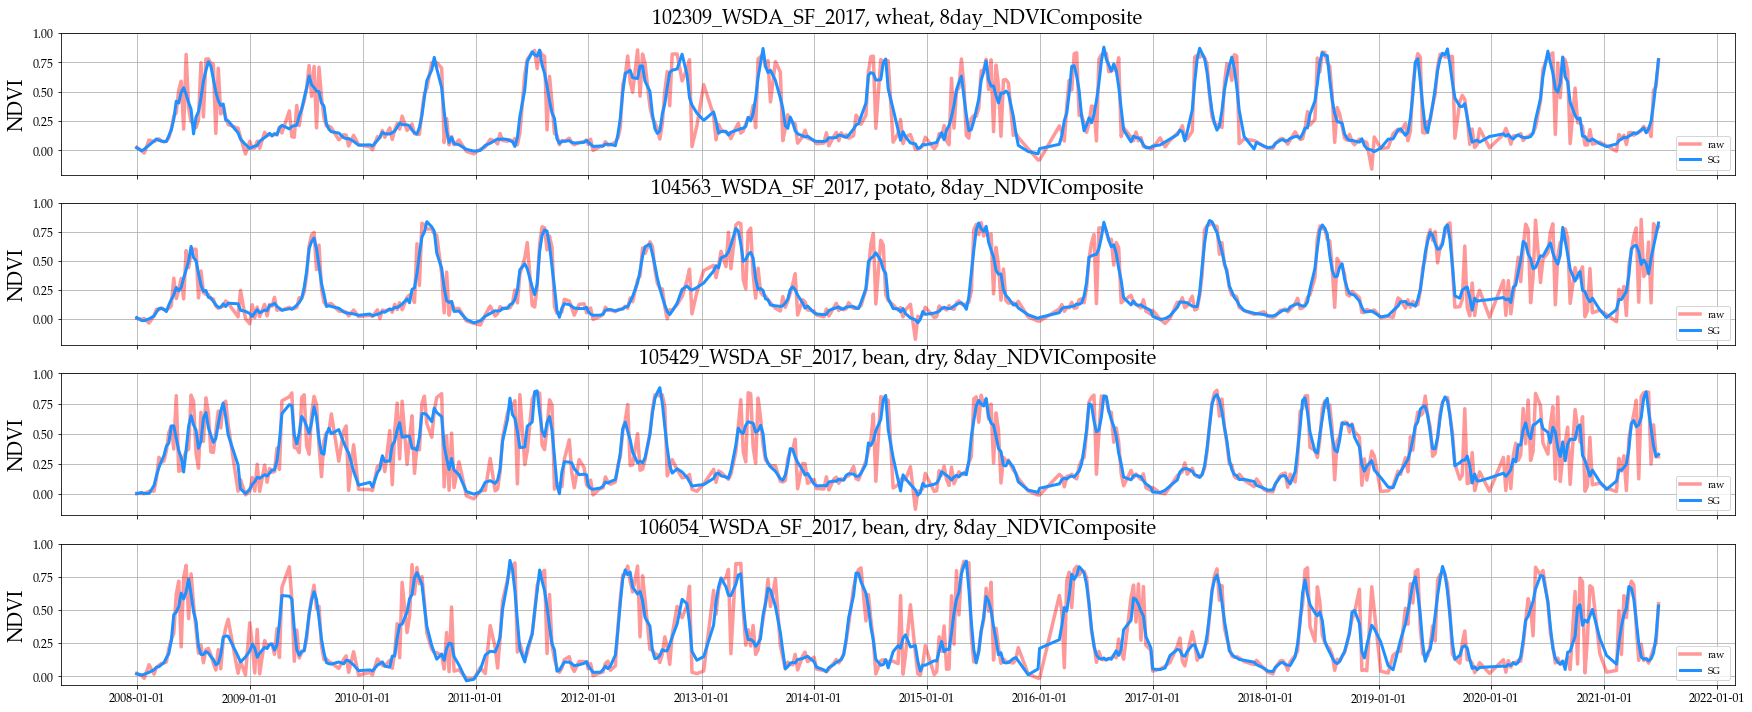

In [10]:
fig, axs = plt.subplots(4, 1, figsize=(30, 12),
                    sharex='col', sharey='row',
                    # sharex=True, sharey=True,
                    gridspec_kw={'hspace': 0.2, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

curr_raw = all_data[all_data.ID == ID_list[0]].copy()
curr_raw = curr_raw[curr_raw.dataset==satellite_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.plot_8dayComposite_and_SG(raw_dt=curr_raw, ax=ax1, idx=VI, time_step_size=interval_size)

curr_raw = all_data[all_data.ID == ID_list[1]].copy()
curr_raw = curr_raw[curr_raw.dataset==satellite_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.plot_8dayComposite_and_SG(raw_dt=curr_raw, ax=ax2, idx=VI, time_step_size=interval_size)


curr_raw = all_data[all_data.ID == ID_list[2]].copy()
curr_raw = curr_raw[curr_raw.dataset==satellite_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.plot_8dayComposite_and_SG(raw_dt=curr_raw, ax=ax3, idx=VI, time_step_size=interval_size)

curr_raw = all_data[all_data.ID == ID_list[3]].copy()
curr_raw = curr_raw[curr_raw.dataset==satellite_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.plot_8dayComposite_and_SG(raw_dt=curr_raw, ax=ax4, idx=VI, time_step_size=interval_size)

file_name = data_dir + "raw_figures/"+ "regularized_8dComposite.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);

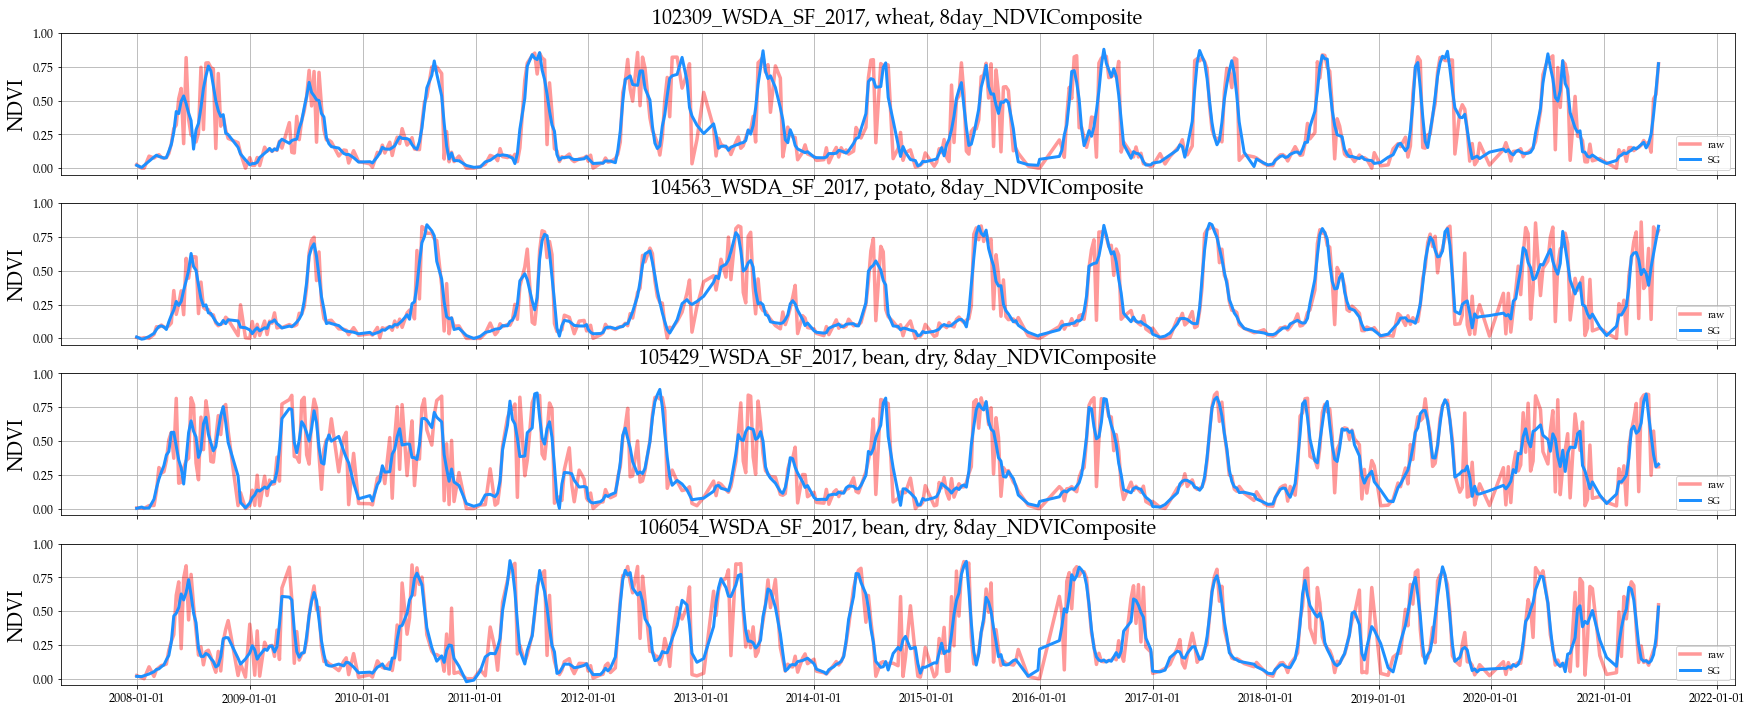

In [11]:
# Set negative values of idx to zero:
all_data.loc[all_data["NDVI"]<0 , "NDVI"] = 0


fig, axs = plt.subplots(4, 1, figsize=(30, 12),
                    sharex='col', sharey='row',
                    # sharex=True, sharey=True,
                    gridspec_kw={'hspace': 0.2, 'wspace': .05});

(ax1, ax2, ax3, ax4) = axs;
ax1.grid(True); ax2.grid(True)
ax3.grid(True); ax4.grid(True)

curr_raw = all_data[all_data.ID == ID_list[0]].copy()
curr_raw = curr_raw[curr_raw.dataset==satellite_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.plot_8dayComposite_and_SG(raw_dt=curr_raw, ax=ax1, idx=VI, time_step_size=interval_size)

curr_raw = all_data[all_data.ID == ID_list[1]].copy()
curr_raw = curr_raw[curr_raw.dataset==satellite_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.plot_8dayComposite_and_SG(raw_dt=curr_raw, ax=ax2, idx=VI, time_step_size=interval_size)


curr_raw = all_data[all_data.ID == ID_list[2]].copy()
curr_raw = curr_raw[curr_raw.dataset==satellite_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.plot_8dayComposite_and_SG(raw_dt=curr_raw, ax=ax3, idx=VI, time_step_size=interval_size)

curr_raw = all_data[all_data.ID == ID_list[3]].copy()
curr_raw = curr_raw[curr_raw.dataset==satellite_list[0]].copy()
curr_raw.sort_values(by='human_system_start_time', axis=0, ascending=True, inplace=True)
npc.plot_8dayComposite_and_SG(raw_dt=curr_raw, ax=ax4, idx=VI, time_step_size=interval_size)

file_name = data_dir + "raw_figures/"+ "regularized_8dComposite_NegativesSetToZero.pdf"
plt.savefig(fname = file_name, dpi=400, bbox_inches='tight', transparent=False);